<a href="https://colab.research.google.com/github/emarttila/Koodausnaytteet/blob/main/Voimatasot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline 
import matplotlib as mpl

In [9]:
# Tämä ohjelma laskee, mikä on yhden toiston maksimisi näissä liikkeissä (penkkipunnerrus, kyykky, pystypunnerrus ja maastaveto) ja millä tasolla olet liikkeissä muihin verrattuna. Tasot ovat hatusta (internetistä) vedettyjä ja etäisesti suuntaa antavia. Ohjelma kertoo myös, millä painolla kannattaa harjoitella mitäkin voiman osa-aluetta. Painolla on laaja skaala ja se on myös etäisesti suuntaa antava. Kirjoita kehonpaino (kg), "Mies" tai "Nainen", paino (kg) millä saat maksimissaan tietyn määrän toistoja (1-10 toistoa). Toistomäärä kirjoitetaan esim 'penkkitoistoa' jälkeen. Ohjelmaan on valmiiksi syötetty fiktiiviset tiedot esimerkin vuoksi.

kehonpaino = 60

sukupuoli = "Mies"

penkki = 95
penkkitoistoa = 3

kyykky = 120
kyykkytoistoa = 1

pypu = 55
pyputoistoa = 2

mave = 140
mavetoistoa = 1

In [10]:
# Voimatasojen viitearvot määräytvät sukupuolen mukaan

taso_m = np.array([[0.75 * kehonpaino, 1 * kehonpaino, 1.3 * kehonpaino, 1.5 * kehonpaino, 1.75 * kehonpaino, 290], [1 * kehonpaino, 1.2 * kehonpaino,\
                1.5 * kehonpaino, 1.75 * kehonpaino, 2 * kehonpaino, 455], [0.5 * kehonpaino, 0.65 * kehonpaino, 0.85 * kehonpaino, 1 * kehonpaino, 1.25 * kehonpaino, 250], \
                [1* kehonpaino, 1.3 * kehonpaino, 1.65 * kehonpaino, 2 * kehonpaino, 2.25 * kehonpaino, 501]])
taso_n = np.array([[0.65 * kehonpaino, 0.7 * kehonpaino, 0.85 * kehonpaino, 1 * kehonpaino, 1.25 * kehonpaino, 207], [0.8 * kehonpaino, 1 * kehonpaino,\
                1.3 * kehonpaino, 1.5 * kehonpaino, 1.75 * kehonpaino, 279], [0.35 * kehonpaino, 0.5 * kehonpaino, 0.75 * kehonpaino, 0.8 * kehonpaino, 0.9 * kehonpaino, 100], \
                [1* kehonpaino, 1.3 * kehonpaino, 1.65 * kehonpaino, 2 * kehonpaino, 2.25 * kehonpaino, 275]])

if sukupuoli == "Mies":
  taso = taso_m
elif sukupuoli == "Nainen":
  taso = taso_n
else:
   print("Valitse 'Mies' tai 'Nainen'")
   taso = 0
   rm = 0

In [11]:
# Lasketaan yhden toiston maksimit eri liikkeissä painokertoimien avulla.

painokerroin = np.array([1, 0.95, 0.90, 0.88, 0.86, 0.83, 0.80, 0.78, 0.76, 0.75])
penkkirm = penkki / painokerroin[penkkitoistoa-1]
kyykkyrm = kyykky / painokerroin[kyykkytoistoa-1]
pypurm = pypu / painokerroin[pyputoistoa-1]
maverm = mave / painokerroin[mavetoistoa-1]
rm = np.array([penkkirm, kyykkyrm, pypurm, maverm])

# Tehdään taulukko josta selviää voimataso verrattuna muihin, yhden toiston maksimi (RM) ja arvioitu yläraja painoon, jota voi käyttää tietynlaiseen voiman lajin harjoitteluun.

liike = np.array(["Penkki", "Kyykky", "Pypu", "Mave"])
rows = ["Penkki", "Kyykky", "Pypu", "Mave"]
columns = ["Kohtuullinen", "Hyvä", "Optimaalinen", "Kehittynyt", "Atleetti", "ME"]
Taulukko = pd.DataFrame(taso, index = rows, columns = columns)
RM = pd.DataFrame(rm, index = rows, columns = ["RM"])
Liike = pd.DataFrame(liike, index = rows, columns = ["Liike"])
Taulukko = pd.merge(left=Taulukko, right=RM, left_index = True, right_index = True)
Taulukko = pd.merge(left=Taulukko, right=Liike, left_index = True, right_index = True)
Toistoalue = pd.DataFrame(np.array([[0.2 * penkkirm, 0.6 * penkkirm, 0.85 * penkkirm, penkkirm], [0.2 * kyykkyrm, 0.6 * kyykkyrm, 0.85 * kyykkyrm, kyykkyrm], [0.2 * pypurm, 0.6 * pypurm, 0.85 * pypurm, pypurm], [0.2 * maverm, 0.6 * maverm, 0.85 * maverm, maverm] ]), index = rows, columns = ["Lihaskestävyys", "Voimakestävyys", "Perusvoima", "Maksimivoima"])
Taulukko = pd.merge(left=Taulukko, right=Toistoalue, left_index = True, right_index = True)

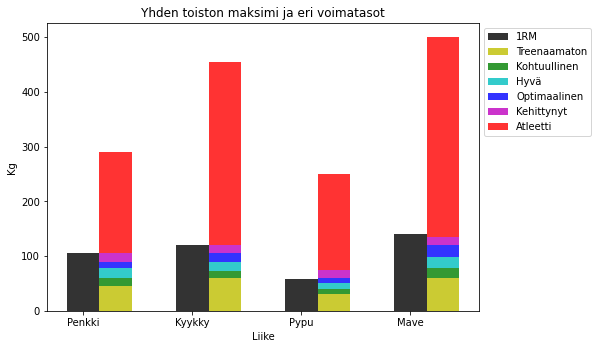

In [17]:
# Kuvataan yhden toiston maksimi liikkeessä mustana palkkina ja eri voimatasot värillisinä. Värillisen palkin yläraja on suuntaa antava maailmanennätys.

labels = ['Penkki', 'Kyykky', 'Pypu', 'Mave']
X = np.arange(len(labels))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, Taulukko.RM,color = "k", alpha=0.8, width = 0.3, label = "1RM")
ax.bar(X + 0.3, Taulukko.Kohtuullinen, color = "y", alpha = 0.8, width = 0.3, label = "Treenaamaton" )
ax.bar(X + 0.3, Taulukko.Hyvä - Taulukko.Kohtuullinen, bottom = Taulukko.Kohtuullinen, color = "g", alpha = 0.8, width = 0.3, label = "Kohtuullinen")
ax.bar(X + 0.3, Taulukko.Optimaalinen - Taulukko.Hyvä, bottom= Taulukko.Hyvä, color = "c", alpha = 0.8, width = 0.3, label = "Hyvä")
ax.bar(X + 0.3, Taulukko.Kehittynyt - Taulukko.Optimaalinen, bottom = Taulukko.Optimaalinen, color = "b", alpha = 0.8, width = 0.3, label = "Optimaalinen")
ax.bar(X + 0.3, Taulukko.Atleetti - Taulukko.Kehittynyt, bottom = Taulukko.Kehittynyt, color = "m", alpha = 0.8, width = 0.3, label = "Kehittynyt")
ax.bar(X + 0.3, Taulukko.ME - Taulukko.Atleetti, bottom = Taulukko.Atleetti, color = "r", alpha = 0.8, width = 0.3, label = "Atleetti")
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.set_ylabel('Kg')
ax.set_xlabel('Liike')
ax.set_title('Yhden toiston maksimi ja eri voimatasot')
ax.legend(bbox_to_anchor = [1, 1])
plt.show()

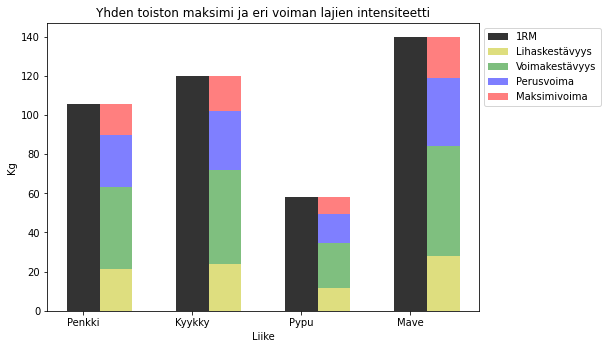

In [16]:
# Musta palkki on jälleen henk koht yhden toiston maksimi ja värillinen kuvaa vastuksen vaihteluväliä, jota voidaan käyttää kyseisen voiman alueen harjoitteluun.

labels = ['Penkki', 'Kyykky', 'Pypu', 'Mave']
X = np.arange(len(labels))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, Taulukko.RM,color = "k", alpha=0.8, width = 0.3, label = "1RM")
ax.bar(X + 0.3, Taulukko.Lihaskestävyys, color = "y", alpha = 0.5, width = 0.3, label = "Lihaskestävyys" )
ax.bar(X + 0.3, Taulukko.Voimakestävyys - Taulukko.Lihaskestävyys, bottom = Taulukko.Lihaskestävyys, color = "g", alpha = 0.5, width = 0.3, label = "Voimakestävyys")
ax.bar(X + 0.3, Taulukko.Perusvoima - Taulukko.Voimakestävyys, bottom= Taulukko.Voimakestävyys, color = "b", alpha = 0.5, width = 0.3, label = "Perusvoima")
ax.bar(X + 0.3, Taulukko.Maksimivoima - Taulukko.Perusvoima, bottom = Taulukko.Perusvoima, color = "r", alpha = 0.5, width = 0.3, label = "Maksimivoima")
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.set_ylabel('Kg')
ax.set_xlabel('Liike')
ax.set_title('Yhden toiston maksimi ja eri voiman lajien intensiteetti')
ax.legend(bbox_to_anchor = [1, 1])
plt.show()